# Class project

### 2. By using the same data in 1, compress Pokemon image data using Autoencoder.
cr. https://colab.research.google.com/drive/12_v73VGIML5Im7D3cXqiJIeD33Z0DJtD


In [1]:
import os, sys

pokemon_y = []
fullpath = []
path = "pokemonclassification/PokemonData"
dirs = os.listdir( path )
for files in dirs:
    pokemon_y.append(files)
    files_path = path + "/" + files
    file = os.listdir( files_path )
    img_path = []
    for img in file:
        img_path.append(files_path + "/" + img )
    fullpath.append(img_path) 


# pokemon_y : Keeping the Pokemon name in array
# fullpath  : The path to the each Pokemon image

# print(pokemon_y)
# print(len(pokemon_y))
# print(fullpath)

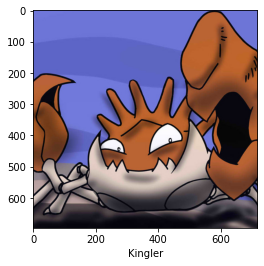

(696, 718, 3)


In [9]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread(fullpath[1][0]).astype('float32') / 255
plt.imshow(img, cmap = 'gray')
plt.xlabel(pokemon_y[1])
plt.show()
print(img.shape)

In [ ]:
path = []

for i in range(0,len(fullpath)):
    for p in fullpath[i]:
        try:
            img_p = mpimg.imread(p)
            path.append(p)
        except:
            pass

In [ ]:
# get an input

import cv2

pokemon_x = []
for i in range(0,len(path)):    
    img_p = mpimg.imread(path[i])
    img_p = cv2.resize(img_p, (512,512))
    img_p = np.array(img_p)
    pokemon_x.append(img_p)
    
pokemon_x = np.array(pokemon_x)
print(pokemon_x.shape)

In [14]:
# using Keras
import tensorflow as tf
import tensorflow.keras.layers
import tensorflow.keras.models

inputs = tf.keras.Input(shape=(512,512,))

#encoder
layer1 = tf.keras.layers.Conv2D()
layer2 = tf.keras.layers.Dense(256, activation=tf.nn.relu)(inputs)

#compression -> compressed data
layer2 = tf.keras.layers.Dense(128, activation=tf.nn.relu)(encoder)

#dercoder
layer3 = tf.keras.layers.Dense(256, activation=tf.nn.relu)(compressed)

outputs = tf.keras.layers.Dense(512, activation=tf.nn.relu)(decoder)

autoencoder = tf.keras.Model(inputs, outputs)

/home/aii/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aii/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aii/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aii/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarnin

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
autoencoder.compile(optimizer = tf.keras.optimizers.SGD()
                    , loss = tf.keras.losses.MeanSquaredError())

Instructions for updating:
Use tf.cast instead.


In [ ]:
autoencoder.fit(pokemon_x,pokemon_x, epochs = 200, verbose = 0)